# COMP2002 Jupyter Notebook Template
Jupyter Notebook for the 70% Coursework for COMP2002.

Task 1.1 - Data Preparation

In [1]:
#Add all imports here
from sklearn.model_selection import cross_val_score
import random
import pandas
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [25]:
#Data preparation
columnNames = ["X1","X2","X3","X4","X5","X6","X7","X8","Y1","Y2"]
data = pandas.read_excel("COMP2002Data.xlsx", names = columnNames)
values = data.values
inputs = values[:,:8].astype(float)
targets = values[:,8:].astype(float)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(inputs)
X_train, X_test, Y_train, Y_test = train_test_split(scaled, targets)

Task 1.2 - Regression

Random Forest

In [26]:
#RandomForestGenerator regressor code

regressorRandomForest = RandomForestRegressor(max_depth=20)
regressorRandomForest.fit(X_train, Y_train)
Y_pred = regressorRandomForest.predict(X_test)

print("MSE:",metrics.mean_squared_error(Y_test, Y_pred))
#End of RandomForestGenerator regressor code

MSE: 2.1973989274343806


In [39]:
#NeuralNetwork regressor code

regressorMLP = MLPRegressor(max_iter=16000)
regressorMLP.fit(X_train, Y_train)
Y_pred = regressorMLP.predict(X_test)

print("MSE:",metrics.mean_squared_error(Y_test, Y_pred))
#End of NeuralNetwork regressor code

MSE: 1.506538091289684


In [42]:
#SVR Regressor Code

regressorSVR = SVR()
regressorSVR2 = SVR()
regressorSVR.fit(X_train,Y_train[:,0])
regressorSVR2.fit(X_train,Y_train[:,1])
Y_pred = regressorSVR.predict(X_test)
X_pred = regressorSVR2.predict(X_test)

mseSVR1 = metrics.mean_squared_error(X_test[:,0], Y_pred)
mseSVR2 = metrics.mean_squared_error(X_test[:,1], X_pred)


print("MSE:",mseSVR1)
print("MSE:",mseSVR2)

#End of SVR Regressor code

MSE: 601.5779950576099
MSE: 677.0795131340121


Task 1.3 - Cross Validation

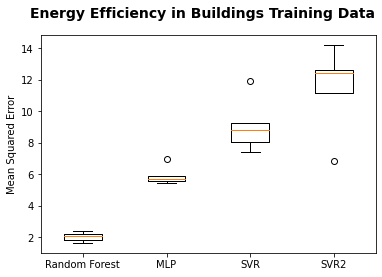

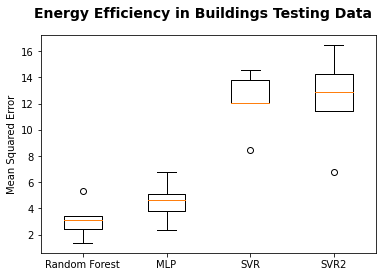

In [41]:
#Cross validation for each of the training scores
scoresRandomForest = cross_val_score(regressorRandomForest, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
scoresMLP = cross_val_score(regressorMLP, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
scoresSVR = cross_val_score(regressorSVR, X_train, Y_train[:,0], cv=5, scoring='neg_mean_squared_error')
scoresSVR2 = cross_val_score(regressorSVR2, X_train, Y_train[:,1], cv=5, scoring='neg_mean_squared_error')
#Making all the training validation positive
scoresRandomForest = np.abs(scoresRandomForest)
scoresMLP = np.abs(scoresMLP)
scoresSVR = np.abs(scoresSVR)
scoresSVR2 = np.abs(scoresSVR2)
#Cross validation for each of the testing scores
test_scoresRandomForest = cross_val_score(regressorRandomForest, X_test, Y_test, cv=5, scoring='neg_mean_squared_error')
test_scoresMLP = cross_val_score(regressorMLP, X_test, Y_test, cv=5, scoring='neg_mean_squared_error')
test_scoresSVR = cross_val_score(regressorSVR, X_test, Y_test[:,0], cv=5, scoring='neg_mean_squared_error')
test_scoresSVR2 = cross_val_score(regressorSVR2, X_test, Y_test[:,1], cv=5, scoring='neg_mean_squared_error')

#Making all the testing validation positive
test_scoresRandomForest = np.abs(test_scoresRandomForest)
test_scoresMLP = np.abs(test_scoresMLP)
test_scoresSVR = np.abs(test_scoresSVR)
test_scoresSVR2 = np.abs(test_scoresSVR2)

###Plotting the training validation data onto a boxplot

plt.boxplot([scoresRandomForest, scoresMLP, scoresSVR, scoresSVR2])
plt.suptitle('Energy Efficiency in Buildings Training Data', fontsize=14, fontweight='bold')
plt.ylabel('Mean Squared Error')
plt.xticks([1,2,3,4], ['Random Forest', 'MLP', 'SVR', 'SVR2'])
plt.show()

###Plotting the testing validation data onto a boxplot
plt.boxplot([test_scoresRandomForest, test_scoresMLP, test_scoresSVR, test_scoresSVR2])
plt.suptitle('Energy Efficiency in Buildings Testing Data', fontsize=14, fontweight='bold')
plt.ylabel('Mean Squared Error')
plt.xticks([1,2,3,4], ['Random Forest', 'MLP', 'SVR', 'SVR2'])
plt.show()

# Task 2: Optimisation

Task 2.1: Generation of Random Solutions

Reads in the file, creates a timetable of Objects and first mutation function, RuinAndRecreate

In [14]:
#Variable that reads the data from the txt file
data = pandas.read_csv("Modules.txt", sep = "|", header = None)
#Module class to hold objects
class Module:
    def __init__(self, moduleName, moduleLeader, labs, clashes, isLab):
        self.moduleName = moduleName
        self.moduleLeader = moduleLeader
        self.labs = labs
        self.clashes = clashes
        self.isLab = isLab

#An array that will hold all the information about the specific module
list = []
for index, row in data.iterrows():
    list.append(Module(row[0], row[1], row[2], row[3], False))


#Ruin and recreate function, takes in a timetable and returns a new generated one
def RuinAndRecreate(timetable):
    #Creates the module list with the amount of times it has to go into the timetable
    moduleAmount = []
    for i in range(len(list)):
        moduleAmount.append(list[i])
        for j in range(int(list[i].labs)):
            moduleAmount.append(Module(
                list[i].moduleName,
                list[i].moduleLeader,
                list[i].labs,
                list[i].clashes,
                True
            ))
    #Make sure that the frame gets filled
    while(len(moduleAmount) < 60):
        moduleAmount.append(Module("", "", 0, 0, False))
    #Shuffled the array for a random solution
    np.random.shuffle(moduleAmount)
    df = pandas.DataFrame(columns=['LEC1','LAB1','LAB2'],index=range(0,20))
    j = 0
    k = 0
    for i in range(len(moduleAmount)):
        if i < 20:
            df.loc[i, 'LEC1'] = moduleAmount[i]
        elif i >= 20 and i < 40:
            df.loc[j, 'LAB1'] = moduleAmount[i]
            j += 1
        elif i >= 40 and i < 60:
            df.loc[k, 'LAB2'] = moduleAmount[i]
            k += 1
    return df
#End of RuinAndRecreate


Second mutation function, swap session:

In [13]:
#Second mutation function, swaps modules
def swapSession(timetable):
    #Choose the two random columns
    column1, column2 = random.randint(0,2), random.randint(0,2)

    #Generate two random rows
    row1, row2 = random.randint(0,19), random.randint(0,19)
    #Check row1 and row2 aren't the same if column1 and column2 are
    if column1 == column2 & row1 == row2:
        return swapSession(timetable)
    #If not the same    
    #Select the value from the row
    match column1:
        case 0:
            column1Value = 'LEC1'
        case 1:
            column1Value = 'LAB1'
        case 2:
            column1Value = 'LAB2'
    match column2:
        case 0:
            column2Value = 'LEC1'
        case 1:
            column2Value = 'LAB1'
        case 2:
            column2Value = 'LAB2'
    #Select the value
    temp = timetable.loc[row1, column1Value]

    #Swap the values
    timetable.loc[row1, column1Value] = timetable.loc[row2, column2Value]
    timetable.loc[row2, column2Value] = temp
    return timetable
    #End of mutation function swapSession

Fitness Function:

In [12]:
#Concurrence Constraints
def concurrence_constraints(timetable):
    concurrence = 0
    for i in range(len(timetable)):
        #Get a list of the clashes for the Lecture
        currentModuleClashes = timetable.loc[i, 'LEC1'].clashes
        currentModuleClashes = str(currentModuleClashes).split(",")#Split because python is weird
        if timetable.loc[i, 'LAB1'].moduleName in currentModuleClashes:#Checks if the option in LAB1 is in the clashes
            concurrence += 1
        if timetable.loc[i, 'LAB2'].moduleName in currentModuleClashes:#Checks if the option in LAB2 is in the clashes
            concurrence += 1
        currentModuleClashes = timetable.loc[i, 'LAB1'].clashes#Check if LAB1 and LAB2 clash
        currentModuleClashes = str(currentModuleClashes).split(",")
        if timetable.loc[i, 'LAB2'].moduleName in currentModuleClashes:
            concurrence += 1
        
        if timetable.loc[i, 'LEC1'].moduleName == timetable.loc[i, 'LAB1'].moduleName:#Check if lecture is repeated
            concurrence += 1
        if timetable.loc[i, 'LEC1'].moduleName == timetable.loc[i, 'LAB2'].moduleName:
            concurrence += 1
        if timetable.loc[i, 'LAB1'].moduleName == timetable.loc[i, 'LAB2'].moduleName:
            concurrence += 1
    return concurrence
    #concurrence_restraints(RuinAndRecreate())
#End of concurrence constraints

#Precedence Constraints
def precendence_constraints(timetable):
    #Iterate through the timetable
    #If not, add to the list of lecturesInTimetable
    #If a lab is found in a lab room, check that the lecture has already been found
    #If it has been found, make sure that it is above in the timetable
    precedence = 0
    lecturesInTimetable = []
    for i in range(len(timetable)):
        if timetable.loc[i, 'LEC1'].isLab == True:
            if timetable.loc[i, 'LEC1'].moduleName not in lecturesInTimetable:
                precedence += 1
        else:
            if timetable.loc[i, 'LEC1'].moduleName not in lecturesInTimetable:
                for j in range(i, 0, -1):
                    if timetable.loc[j, 'LAB1'].moduleName == timetable.loc[i, 'LEC1'].moduleName:
                        if timetable.loc[j, 'LAB1'].isLab == True:
                            precedence += 1
                    elif timetable.loc[j, 'LAB2'].moduleName == timetable.loc[i, 'LEC1'].moduleName:
                        if timetable.loc[j, 'LAB2'].isLab == True:
                            precedence += 1
                    else:
                        lecturesInTimetable.append(timetable.loc[i, 'LEC1'].moduleName)
    return precedence
    #precedence_restraints(RuinAndRecreate())
    #End of precedence constraints

def fitness(timetable):
    return concurrence_constraints(timetable) * precendence_constraints(timetable)


Task 2.2: Algorithm Implementation

Initial Solution Generation

In [11]:
#First solution generation to put into the hill climber
def generateFirstSolution():
    solution = []
    moduleAmount = []
    for i in range(len(list)):
        moduleAmount.append(list[i])
        for j in range(int(list[i].labs)):
            moduleAmount.append(Module(
                list[i].moduleName,
                list[i].moduleLeader,
                list[i].labs,
                list[i].clashes,
                True
            ))
    #Make sure that the frame gets filled
    while(len(moduleAmount) < 60):
        moduleAmount.append(Module("", "", 0, 0, False))
    #Shuffled the array for a random solution
    np.random.shuffle(moduleAmount)
    timetable = pandas.DataFrame(columns=['LEC1','LAB1','LAB2'],index=range(0,20))
    j = 0
    k = 0
    for i in range(len(moduleAmount)):
        if i < 20:
            timetable.loc[i, 'LEC1'] = moduleAmount[i]
        elif i >= 20 and i < 40:
            timetable.loc[j, 'LAB1'] = moduleAmount[i]
            j += 1
        elif i >= 40 and i < 60:
            timetable.loc[k, 'LAB2'] = moduleAmount[i]
            k += 1
    solution.append(timetable)
    return timetable
#End of first solution generation

Hillclimber

In [10]:
##Start of comparison function
def less_than_equal(a,b):
    return a <= b
#End of comparison function

#Start of hill climber
def hillclimber(Niter, timetable, fitness, mutation, compare):
    #Initialise a random solution.
    fitnessList = []
    parent = timetable
    parent_fitness = fitness(parent)
    for i in range(Niter):
        child = mutation(parent)
        child_fitness = fitness(child)

        if compare(child_fitness, parent_fitness):
            parent = child
            parent_fitness = child_fitness
        fitnessList.append(parent_fitness)
    
    #Return the new parent, the fitness of the parent, and the fitness of each iteration
    return parent, parent_fitness, fitnessList 
#End of hillclimber

Task 2.3: Visualisation of Results

Graph generation

In [9]:
#Start of calculating max, min and average fitness
def calculations(fitness):
    maxi = []
    mini = []
    aver = []
    for i in range(500):
        currentIteration = []
        for j in range(30):
            currentIteration.append(fitness[j][i])
        maxi.append(max(currentIteration))
        mini.append(min(currentIteration))
        aver.append(np.mean(currentIteration))
    return maxi, mini, aver
#End of calculating max, min and average fitness

#Start of graph plotting
def plotFitness(fitnessRuin, fitnessSwap):
    maxiRuin, miniRuin, averRuin = calculations(fitnessRuin)
    maxiSwap, miniSwap, averSwap = calculations(fitnessSwap)
    plt.plot(maxiRuin, label = 'Maximum Ruin')
    plt.plot(miniRuin, label = 'Minimum Ruin')
    plt.plot(averRuin, label = 'Average Ruin')
    plt.plot(maxiSwap, label = 'Maximum Swap')
    plt.plot(miniSwap, label = 'Minimum Swap')
    plt.plot(averSwap, label = 'Average Swap')
    plt.ylabel('Fitness')
    plt.xlabel('Iteration')
    plt.legend()
    plt.show()
#End of graph plotting

### Block to run for the optimisation to work

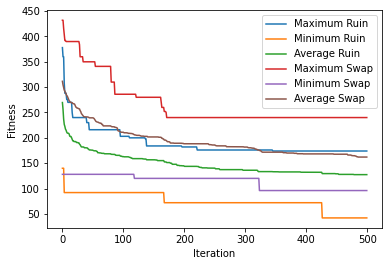

In [16]:
#Incase first cell with imports isn't ran
import pandas
import numpy as np
import random
import matplotlib.pyplot as plt
#End of imports

timetable = generateFirstSolution()
fitness_array = [[0 for j in range(500)] for k in range(30)]
fitness2_array = [[0 for j in range(500)] for k in range(30)]
for i in range(30):
    x, y, fitnessList = hillclimber(500, timetable, fitness, RuinAndRecreate, less_than_equal)
    fitness_array[i] = fitnessList
    j, k, fitnessList2 = hillclimber(500, timetable, fitness, swapSession, less_than_equal)
    fitness2_array[i] = fitnessList2

plotFitness(fitness_array, fitness2_array)  

Ultimately, the RuinAndRecreate function generates the better results when compared to Session Swapping. 

Since an entirely new timetable, there is an exponential possible swaps that can be made that can lead to a better solution.

However, if only two modules are swapped, if its initial generation gives a high fitness, it would take a lot more iterations to generate a lower score than randomness.